# Optimisasi Kebijakan Tenaga Kerja Melalui Prediksi Time Series Tingkat Pengangguran dan Peluang Kerja di Jawa Barat

## Business Undesrtanding

Salah satu provonsi di Indonesia yaitu Jawa Barat menghadapi tantangan kompleks dalam mengelola angka pengangguran dan peluang kerja.  Pendekatan yang canggih diperlukan untuk memahami dan memprediksi tren di pasar tenaga kerja. Dengan membuat model prediksi time series untuk tingkat pengangguran dan peluang kerja di Jawa Barat mampu memberikan dasar yang kuat untuk perencanaan kebijakan yang efisien dan disesuaikan dengan dinamika pasar tenaga kerja di Jawa Barat.

**Goal** : Predictive Tingkat Pengangguran untuk Peluang Kerja 1 Tahun Kedepan

**Case problem** : Time Series

**Jenis Machine Learning** = Supervised Learning

**Algoritma** :
* Moving average
* Exponential smoothing
* SARIMAX
* ARIMA
* LSTM

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### DATA PENGANGGURAN

In [535]:
path='/content/drive/MyDrive/DataProject/persentase_tingkat_pengangguran.csv'
load_data=pd.read_csv(path)
load_data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,14,PERSEN,2007
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,11,PERSEN,2007
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14,PERSEN,2007
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,17,PERSEN,2007
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,12,PERSEN,2007


In [536]:
df=pd.DataFrame(load_data)
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,14,PERSEN,2007
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,11,PERSEN,2007
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14,PERSEN,2007
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,17,PERSEN,2007
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,12,PERSEN,2007
...,...,...,...,...,...,...,...,...
365,366,32,JAWA BARAT,3275,KOTA BEKASI,9,PERSEN,2022
366,367,32,JAWA BARAT,3276,KOTA DEPOK,8,PERSEN,2022
367,368,32,JAWA BARAT,3277,KOTA CIMAHI,11,PERSEN,2022
368,369,32,JAWA BARAT,3278,KOTA TASIKMALAYA,7,PERSEN,2022


In [537]:
df_filtered = df.loc[(df['tahun'] < 2007) | (df['tahun'] > 2015)]
df_filtered

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,satuan,tahun
208,209,32,JAWA BARAT,3201,KABUPATEN BOGOR,10,PERSEN,2017
209,210,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,8,PERSEN,2017
210,211,32,JAWA BARAT,3203,KABUPATEN CIANJUR,10,PERSEN,2017
211,212,32,JAWA BARAT,3204,KABUPATEN BANDUNG,4,PERSEN,2017
212,213,32,JAWA BARAT,3205,KABUPATEN GARUT,8,PERSEN,2017
...,...,...,...,...,...,...,...,...
365,366,32,JAWA BARAT,3275,KOTA BEKASI,9,PERSEN,2022
366,367,32,JAWA BARAT,3276,KOTA DEPOK,8,PERSEN,2022
367,368,32,JAWA BARAT,3277,KOTA CIMAHI,11,PERSEN,2022
368,369,32,JAWA BARAT,3278,KOTA TASIKMALAYA,7,PERSEN,2022


In [585]:
df_mean = df_filtered.groupby('tahun')['persentase_tingkat_pengangguran_terbuka'].mean().reset_index()
df_mean.columns = ['tahun', 'mean_tingkat_pengangguran']
df_mean

,tahun,mean_tingkat_pengangguran
0,2017,8
1,2018,8
2,2019,8
3,2020,10
4,2021,9
5,2022,8


### DATA JUMLAH LOWONGAN PEKERJAAN

In [539]:
path1='/content/drive/MyDrive/DataProject/jumlah_lowongan_kerja.csv'
load_data1=pd.read_csv(path1)
load_data1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_lowongan_kerja,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,20,LOWONGAN KERJA,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,193,LOWONGAN KERJA,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0,LOWONGAN KERJA,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,LOWONGAN KERJA,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2,LOWONGAN KERJA,2018


In [540]:
df1=pd.DataFrame(load_data1)
df1

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_lowongan_kerja,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,20,LOWONGAN KERJA,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,193,LOWONGAN KERJA,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,0,LOWONGAN KERJA,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,0,LOWONGAN KERJA,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2,LOWONGAN KERJA,2018
...,...,...,...,...,...,...,...,...
130,131,32,JAWA BARAT,3275,KOTA BEKASI,10879,LOWONGAN KERJA,2022
131,132,32,JAWA BARAT,3276,KOTA DEPOK,5994,LOWONGAN KERJA,2022
132,133,32,JAWA BARAT,3277,KOTA CIMAHI,2340,LOWONGAN KERJA,2022
133,134,32,JAWA BARAT,3278,KOTA TASIKMALAYA,469,LOWONGAN KERJA,2022


In [541]:
df1_lowongan = df1.groupby('tahun')['jumlah_lowongan_kerja'].sum().reset_index()
df1_lowongan.columns = ['tahun', 'total_jumlah_lowongan_kerja']
df1_lowongan

,tahun,total_jumlah_lowongan_kerja
0,2018,8498
1,2019,10068
2,2020,4509
3,2021,143707
4,2022,169005


### DATA JUMLAH PENDUDUK BERDASARKAN JENIS KELAMIN

In [542]:
path2='/content/drive/MyDrive/DataProject/jumlah_penduduk_yang_bekerja_berdasarkan_jenis_kelamin.csv'
load_data2=pd.read_csv(path2)
load_data2.head()

,id,kode_provinsi,nama_provinsi,jenis_kelamin,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,LAKI-LAKI,11739481,ORANG,2011
1,2,32,JAWA BARAT,PEREMPUAN,5715300,ORANG,2011
2,3,32,JAWA BARAT,LAKI-LAKI,12174176,ORANG,2012
3,4,32,JAWA BARAT,PEREMPUAN,6146932,ORANG,2012
4,5,32,JAWA BARAT,LAKI-LAKI,12635203,ORANG,2013


In [543]:
df2=pd.DataFrame(load_data2)
df2

,id,kode_provinsi,nama_provinsi,jenis_kelamin,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,LAKI-LAKI,11739481,ORANG,2011
1,2,32,JAWA BARAT,PEREMPUAN,5715300,ORANG,2011
2,3,32,JAWA BARAT,LAKI-LAKI,12174176,ORANG,2012
3,4,32,JAWA BARAT,PEREMPUAN,6146932,ORANG,2012
4,5,32,JAWA BARAT,LAKI-LAKI,12635203,ORANG,2013
5,6,32,JAWA BARAT,PEREMPUAN,6096740,ORANG,2013
6,7,32,JAWA BARAT,LAKI-LAKI,12871114,ORANG,2014
7,8,32,JAWA BARAT,PEREMPUAN,6359829,ORANG,2014
8,9,32,JAWA BARAT,LAKI-LAKI,12865217,ORANG,2015
9,10,32,JAWA BARAT,PEREMPUAN,5926265,ORANG,2015


In [544]:
df2_jml_penduduk = df2.groupby('tahun')['jumlah_penduduk'].sum().reset_index()
df2_jml_penduduk.columns = ['tahun', 'total_jumlah_penduduk']
df2_jml_penduduk

,tahun,total_jumlah_penduduk
0,2011,17454781
1,2012,18321108
2,2013,18731943
3,2014,19230943
4,2015,18791482
5,2016,19202038
6,2017,20551575
7,2018,20779888
8,2019,21902958
9,2020,21674854


### DATA GABUNGAN

In [545]:
data = df_mean.merge(df1_lowongan, on='tahun').merge(df2_jml_penduduk, on='tahun')
data

,tahun,mean_tingkat_pengangguran,total_jumlah_lowongan_kerja,total_jumlah_penduduk
0,2018,8,8498,20779888
1,2019,8,10068,21902958
2,2020,10,4509,21674854
3,2021,9,143707,22313481
4,2022,8,169005,23452568


In [546]:
# data.to_excel('/content/drive/MyDrive/DataProject/data_before_2018-2022.xlsx', index=False)

## Data Understanding

In [547]:
path3='/content/drive/MyDrive/DataProject/data_before_2018-2022.xlsx'
load_data3=pd.read_excel(path3)
load_data3

,tahun,mean_tingkat_pengangguran,total_jumlah_lowongan_kerja,total_jumlah_penduduk
0,2018,8,8498,20779888
1,2019,8,10068,21902958
2,2020,10,4509,21674854
3,2021,9,143707,22313481
4,2022,8,169005,23452568


In [548]:
df3=pd.DataFrame(load_data3)
df3

,tahun,mean_tingkat_pengangguran,total_jumlah_lowongan_kerja,total_jumlah_penduduk
0,2018,8,8498,20779888
1,2019,8,10068,21902958
2,2020,10,4509,21674854
3,2021,9,143707,22313481
4,2022,8,169005,23452568


In [549]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tahun                        5 non-null      int64  
 1   mean_tingkat_pengangguran    5 non-null      float64
 2   total_jumlah_lowongan_kerja  5 non-null      int64  
 3   total_jumlah_penduduk        5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 288.0 bytes


In [550]:
df3.isnull().sum()

tahun                          0
mean_tingkat_pengangguran      0
total_jumlah_lowongan_kerja    0
total_jumlah_penduduk          0
dtype: int64

## Data Preparation

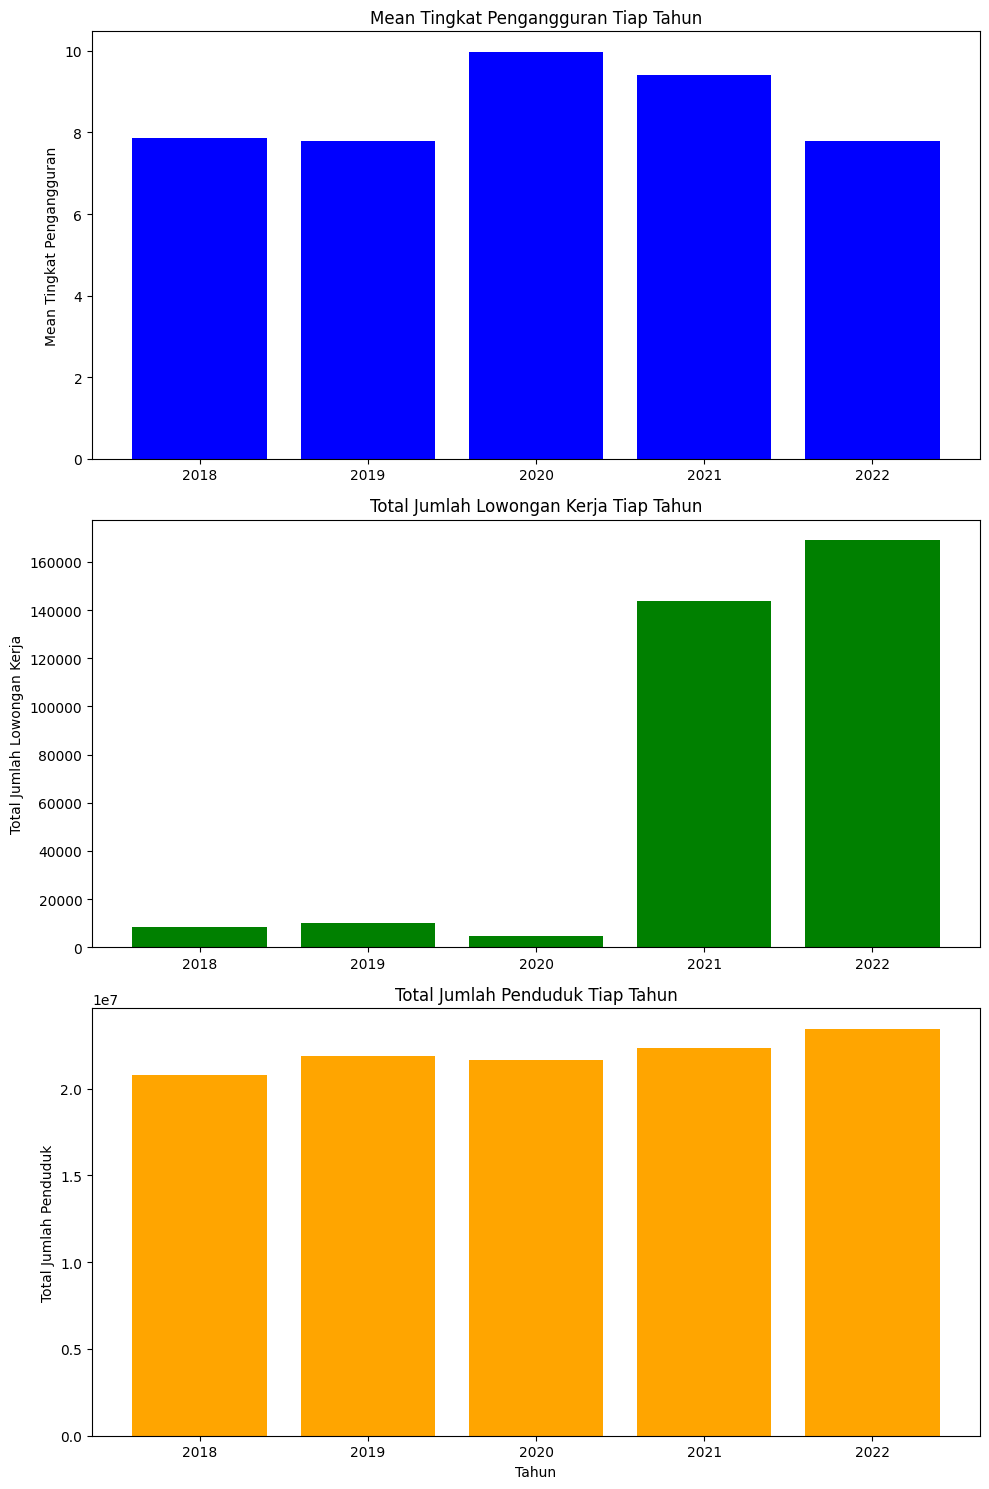

In [551]:
tahun = [2018, 2019, 2020, 2021, 2022]
mean_tingkat_pengangguran = [7.870370, 7.794074, 9.98, 9.401111, 7.801111]
total_jumlah_lowongan_kerja = [8498, 10068, 4509, 143707, 169005]
total_jumlah_penduduk = [20779888, 21902958, 21674854, 22313481, 23452568]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

ax1.bar(tahun, mean_tingkat_pengangguran, color='blue')
ax1.set_title('Mean Tingkat Pengangguran Tiap Tahun')
ax1.set_ylabel('Mean Tingkat Pengangguran')

ax2.bar(tahun, total_jumlah_lowongan_kerja, color='green')
ax2.set_title('Total Jumlah Lowongan Kerja Tiap Tahun')
ax2.set_ylabel('Total Jumlah Lowongan Kerja')

ax3.bar(tahun, total_jumlah_penduduk, color='orange')
ax3.set_title('Total Jumlah Penduduk Tiap Tahun')
ax3.set_ylabel('Total Jumlah Penduduk')

plt.xlabel('Tahun')
plt.tight_layout()
plt.show()

## Data modelling

### MOVING AVERAGE

In [552]:
window_size = 3
df3['tingkat_pengangguran_ma'] = df3['mean_tingkat_pengangguran'].rolling(window=window_size).mean()
print(df3[['tahun', 'mean_tingkat_pengangguran', 'tingkat_pengangguran_ma']])

   tahun  mean_tingkat_pengangguran  tingkat_pengangguran_ma
0   2018                          8                      NaN
1   2019                          8                      NaN
2   2020                         10                        9
3   2021                          9                        9
4   2022                          8                        9


#### Evaluation model

In [553]:
df3.dropna(inplace=True)

mae = mean_absolute_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_ma'])
print(f'MAE Moving Average: {mae}')


rmse = np.sqrt(mean_squared_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_ma']))
print(f'RMSE Moving Average: {rmse}')

MAE Moving Average: 1.0113991769547317
RMSE Moving Average: 1.118677913133318


### EXPONENTIAL SMOOTHING

In [554]:
!pip install statsmodels

In [555]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [556]:
df3['tahun'] = pd.to_datetime(df3['tahun'], format='%Y')
model = ExponentialSmoothing(df3['mean_tingkat_pengangguran'], trend='add', seasonal=None)
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [557]:
# Melakukan prediksi untuk data yang telah ada
df3['tingkat_pengangguran_exp_smooth'] = fit_model.fittedvalues

# Melakukan prediksi untuk 1 tahun ke depan
forecast = fit_model.forecast(steps=12)
df3['tingkat_pengangguran_exp_smooth_forecast'] = forecast

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



#### Evaluation model

In [558]:
mae_exp_smooth = mean_absolute_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_exp_smooth'])
rmse_exp_smooth = np.sqrt(mean_squared_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_exp_smooth']))

print(f'MAE Exponential Smoothing: {mae_exp_smooth}')
print(f'RMSE Exponential Smoothing: {rmse_exp_smooth}')

MAE Exponential Smoothing: 0.22694174108274337
RMSE Exponential Smoothing: 0.2406782397314199


### SARIMAX

In [559]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [560]:
order = (1, 1, 1)  # Parameter order (p, d, q) yang dapat disesuaikan
seasonal_order = (1, 1, 1, 12)  # Parameter seasonal order (P, D, Q, m) yang dapat disesuaikan
model_sarimax = SARIMAX(df3['mean_tingkat_pengangguran'], order=order, seasonal_order=seasonal_order)
fit_model_sarimax = model_sarimax.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [561]:
# Melakukan prediksi untuk data yang telah ada
df3['tingkat_pengangguran_sarimax'] = fit_model_sarimax.fittedvalues

# Melakukan prediksi untuk 1 tahun ke depan
forecast_sarimax = fit_model_sarimax.get_forecast(steps=12)
df3['tingkat_pengangguran_sarimax_forecast'] = forecast_sarimax.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



#### Evaluation model

In [562]:
mae_sarimax = mean_absolute_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_sarimax'])
rmse_sarimax = np.sqrt(mean_squared_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_sarimax']))

print(f'MAE SARIMAX: {mae_sarimax}')
print(f'RMSE SARIMAX: {rmse_sarimax}')

MAE SARIMAX: 4.052962962962962
RMSE SARIMAX: 5.845098013027069


### ARIMA

In [563]:
from statsmodels.tsa.arima.model import ARIMA

In [564]:
order = (1, 1, 1)  # Parameter order (p, d, q) yang dapat disesuaikan
model_arima = ARIMA(df3['mean_tingkat_pengangguran'], order=order)
fit_model_arima = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.



In [565]:
# Melakukan prediksi untuk data yang telah ada
df3['tingkat_pengangguran_arima'] = fit_model_arima.fittedvalues

# Melakukan prediksi untuk 1 tahun ke depan
forecast_arima = fit_model_arima.get_forecast(steps=12)
df3['tingkat_pengangguran_arima_forecast'] = forecast_arima.predicted_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



#### Evaluation model

In [566]:
mae_arima = mean_absolute_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_arima'])
rmse_arima = np.sqrt(mean_squared_error(df3['mean_tingkat_pengangguran'], df3['tingkat_pengangguran_arima']))

print(f'MAE ARIMA: {mae_arima}')
print(f'RMSE ARIMA: {rmse_arima}')

MAE ARIMA: 3.9294957106343396
RMSE ARIMA: 5.81513577241923


### LSTM

In [567]:
import tensorflow as tf

In [568]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [569]:
print(df3.mean_tingkat_pengangguran)

2   10
3    9
4    8
Name: mean_tingkat_pengangguran, dtype: float64


In [570]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

df4 = pd.DataFrame({'mean_tingkat_pengangguran': [7.870370, 7.794074, 9.98, 9.401111, 7.801111]})
array_data = df4['mean_tingkat_pengangguran'].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(array_data.reshape(-1, 1))

time_steps = 2
def create_dataset(dataset, time_steps, target_column=0):
    x_data, y_data = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), :]
        x_data.append(a)
        y_data.append(dataset[i + time_steps, target_column])
    return np.array(x_data), np.array(y_data)

x_data, y_data = create_dataset(scaled_data, time_steps)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_data.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(x_data, y_data, epochs=50, batch_size=1, verbose=2)

predictions = model_lstm.predict(x_data)

predictions_original = scaler.inverse_transform(predictions.reshape(-1, 1))
y_data_original = scaler.inverse_transform(y_data.reshape(-1, 1))

Epoch 1/50
3/3 - 6s - loss: 0.5088 - 6s/epoch - 2s/step
Epoch 2/50
3/3 - 0s - loss: 0.4894 - 44ms/epoch - 15ms/step
Epoch 3/50
3/3 - 0s - loss: 0.4687 - 66ms/epoch - 22ms/step
Epoch 4/50
3/3 - 0s - loss: 0.4516 - 38ms/epoch - 13ms/step
Epoch 5/50
3/3 - 0s - loss: 0.4333 - 57ms/epoch - 19ms/step
Epoch 6/50
3/3 - 0s - loss: 0.4157 - 27ms/epoch - 9ms/step
Epoch 7/50
3/3 - 0s - loss: 0.4058 - 42ms/epoch - 14ms/step
Epoch 8/50
3/3 - 0s - loss: 0.3818 - 47ms/epoch - 16ms/step
Epoch 9/50
3/3 - 0s - loss: 0.3676 - 25ms/epoch - 8ms/step
Epoch 10/50
3/3 - 0s - loss: 0.3490 - 31ms/epoch - 10ms/step
Epoch 11/50
3/3 - 0s - loss: 0.3252 - 27ms/epoch - 9ms/step
Epoch 12/50
3/3 - 0s - loss: 0.3062 - 24ms/epoch - 8ms/step
Epoch 13/50
3/3 - 0s - loss: 0.3024 - 23ms/epoch - 8ms/step
Epoch 14/50
3/3 - 0s - loss: 0.2832 - 19ms/epoch - 6ms/step
Epoch 15/50
3/3 - 0s - loss: 0.2606 - 22ms/epoch - 7ms/step
Epoch 16/50
3/3 - 0s - loss: 0.2467 - 21ms/epoch - 7ms/step
Epoch 17/50
3/3 - 0s - loss: 0.2310 - 26ms/ep

#### Evaluation model

In [571]:
mae = mean_absolute_error(y_data_original, predictions_original)
rmse = np.sqrt(mean_squared_error(y_data_original, predictions_original))

print(f'MAE LSTM: {mae}')
print(f'RMSE LSTM: {rmse}')

MAE LSTM: 0.044519704182942675
RMSE LSTM: 0.0461618310576511


Training Loss: 0.000445959361968562
1/1 [==============================] - 0s 33ms/step


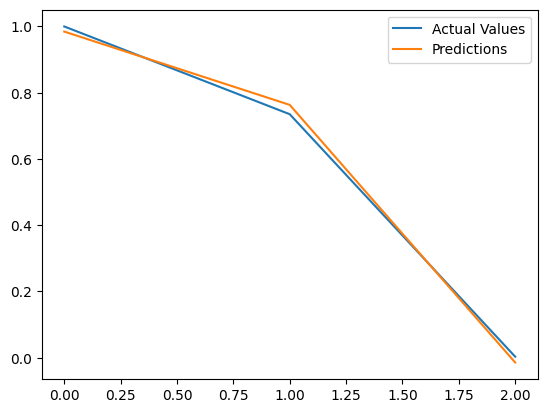

In [572]:
train_loss = model_lstm.evaluate(x_data, y_data, verbose=0)
print(f'Training Loss: {train_loss}')

predictions = model_lstm.predict(x_data)

plt.plot(y_data, label='Actual Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

## Conclusion
Pada kelima pemodelan tingkat pengangguran diperoleh:
1. - MAE Moving Average: 1.0113991769547317
  - RMSE Moving Average: 1.118677913133318
2. - MAE Exponential Smoothing: 0.22694174108274337
  - RMSE Exponential Smoothing: 0.2406782397314199
3. - MAE SARIMAX: 4.052962962962962
  - RMSE SARIMAX: 5.845098013027069
4. - MAE ARIMA: 3.9294957106343396
  - RMSE ARIMA: 5.81513577241923
5. - MAE LSTM: 0.044519704182942675
  - RMSE LSTM: 0.0461618310576511


Dari kelima algoritma di atas, LSTM adalah yang paling cocok untuk apply model to machine learning. Hal ini karena LSTM memiliki MAE yang paling kecil, yaitu 0.044519704182942675. MAE yang kecil menunjukkan bahwa LSTM memiliki error yang kecil, sehingga LSTM lebih akurat dalam memprediksitingkat pengagguran untuk peluang kerja di Jawa Barat.

Secara umum, dalam konteks evaluasi model, nilai MAE dan RMSE yang lebih kecil menunjukkan bahwa model memiliki kinerja yang lebih baik. Model LSTM memberikan tingkat error yang sangat rendah, menunjukkan bahwa model ini mampu menangkap pola dan tren dengan baik pada data waktu yang kompleks.

### Implement Model to Machine Learning

Model yg akan digunakan adalah Long Short-Term Memory (LSTM)

In [573]:
path4='/content/drive/MyDrive/DataProject/data_before_2018-2022.xlsx'
load_data4=pd.read_excel(path4)
load_data4
data_pred=pd.DataFrame(load_data4)
data_pred

,tahun,mean_tingkat_pengangguran,total_jumlah_lowongan_kerja,total_jumlah_penduduk
0,2018,8,8498,20779888
1,2019,8,10068,21902958
2,2020,10,4509,21674854
3,2021,9,143707,22313481
4,2022,8,169005,23452568


In [574]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tahun                        5 non-null      int64  
 1   mean_tingkat_pengangguran    5 non-null      float64
 2   total_jumlah_lowongan_kerja  5 non-null      int64  
 3   total_jumlah_penduduk        5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 288.0 bytes


In [575]:
data_pred.loc[:, "total_jumlah_lowongan_kerja"]

0      8498
1     10068
2      4509
3    143707
4    169005
Name: total_jumlah_lowongan_kerja, dtype: int64

PREDIKSI TINGKAT PENGANGGURAN

In [576]:
time_steps = 2
steps_ahead = 12
future_predictions = []

current_data = x_data[-1]
for _ in range(steps_ahead):
    current_data_reshaped = current_data.reshape(1, time_steps, 1)
    next_prediction_scaled = model_lstm.predict(current_data_reshaped)
    future_predictions.append(next_prediction_scaled[0, 0])
    current_data = np.append(current_data[1:], next_prediction_scaled[0, 0])

future_predictions_original_pengangguran = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Prediksi Tingkat Pengangguran 1 Tahun ke Depan:")
print(future_predictions_original_pengangguran)

1/1 [==============================] - 0s 34ms/step
Prediksi Tingkat Pengangguran 1 Tahun ke Depan:
[[7.762847 ]
 [8.575511 ]
 [9.852571 ]
 [8.7959   ]
 [7.9829736]
 [9.052284 ]
 [9.527851 ]
 [8.465825 ]
 [8.312522 ]
 [9.27032  ]
 [9.172595 ]
 [8.3659   ]]


PREDIKSI JUMLAH LOWONGAN KERJA

In [577]:
jumlah_lowongan_kerja = [8498, 10068, 4509, 143707, 169005]

scaler_lowongan = MinMaxScaler(feature_range=(0, 1))
scaled_data_lowongan = scaler_lowongan.fit_transform(np.array(jumlah_lowongan_kerja).reshape(-1, 1))

x_data_lowongan, y_data_lowongan = create_dataset(scaled_data_lowongan, time_steps)
x_data_lowongan = np.reshape(x_data_lowongan, (x_data_lowongan.shape[0], x_data_lowongan.shape[1], 1))

model_lstm_lowongan = Sequential()
model_lstm_lowongan.add(LSTM(units=50, return_sequences=True, input_shape=(x_data_lowongan.shape[1], 1)))
model_lstm_lowongan.add(LSTM(units=50))
model_lstm_lowongan.add(Dense(units=1))
model_lstm_lowongan.compile(optimizer='adam', loss='mean_squared_error')

model_lstm_lowongan.fit(x_data_lowongan, y_data_lowongan, epochs=50, batch_size=1, verbose=2)

predictions_lowongan = model_lstm_lowongan.predict(x_data_lowongan)

predictions_original_lowongan = scaler_lowongan.inverse_transform(predictions_lowongan.reshape(-1, 1))
y_data_original_lowongan = scaler_lowongan.inverse_transform(y_data_lowongan.reshape(-1, 1))

Epoch 1/50
3/3 - 5s - loss: 0.5685 - 5s/epoch - 2s/step
Epoch 2/50
3/3 - 0s - loss: 0.5499 - 32ms/epoch - 11ms/step
Epoch 3/50
3/3 - 0s - loss: 0.5341 - 96ms/epoch - 32ms/step
Epoch 4/50
3/3 - 0s - loss: 0.5136 - 35ms/epoch - 12ms/step
Epoch 5/50
3/3 - 0s - loss: 0.4889 - 44ms/epoch - 15ms/step
Epoch 6/50
3/3 - 0s - loss: 0.4759 - 50ms/epoch - 17ms/step
Epoch 7/50
3/3 - 0s - loss: 0.4535 - 49ms/epoch - 16ms/step
Epoch 8/50
3/3 - 0s - loss: 0.4287 - 36ms/epoch - 12ms/step
Epoch 9/50
3/3 - 0s - loss: 0.4015 - 31ms/epoch - 10ms/step
Epoch 10/50
3/3 - 0s - loss: 0.3715 - 42ms/epoch - 14ms/step
Epoch 11/50
3/3 - 0s - loss: 0.3554 - 48ms/epoch - 16ms/step
Epoch 12/50
3/3 - 0s - loss: 0.3291 - 28ms/epoch - 9ms/step
Epoch 13/50
3/3 - 0s - loss: 0.2993 - 23ms/epoch - 8ms/step
Epoch 14/50
3/3 - 0s - loss: 0.2673 - 33ms/epoch - 11ms/step
Epoch 15/50
3/3 - 0s - loss: 0.2489 - 31ms/epoch - 10ms/step
Epoch 16/50
3/3 - 0s - loss: 0.2168 - 54ms/epoch - 18ms/step
Epoch 17/50
3/3 - 0s - loss: 0.2104 - 4

In [578]:
steps_ahead_lowongan = 12
future_predictions_lowongan = []

current_data_lowongan = x_data_lowongan[-1]
for _ in range(steps_ahead_lowongan):
    current_data_reshaped_lowongan = current_data_lowongan.reshape(1, time_steps_lowongan, 1)
    next_prediction_scaled_lowongan = model_lstm_lowongan.predict(current_data_reshaped_lowongan)
    future_predictions_lowongan.append(next_prediction_scaled_lowongan[0, 0])
    current_data_lowongan = np.append(current_data_lowongan[1:], next_prediction_scaled_lowongan[0, 0])

future_predictions_original_lowongan = scaler_lowongan.inverse_transform(np.array(future_predictions_lowongan).reshape(-1, 1))

pd.options.display.float_format = '{:,.0f}'.format

print("Prediksi Jumlah Lowongan Kerja 1 Tahun ke Depan:")
print(future_predictions_original_lowongan)

1/1 [==============================] - 0s 32ms/step
Prediksi Jumlah Lowongan Kerja 1 Tahun ke Depan:
[[ 140361.73]
 [ 261546.  ]
 [ 318028.3 ]
 [ 476519.3 ]
 [ 611574.06]
 [ 810810.94]
 [ 959869.25]
 [1087875.9 ]
 [1156830.1 ]
 [1198797.6 ]
 [1218045.1 ]
 [1228283.6 ]]


In [579]:
bulan = [
    'Januari',
    'Februari',
    'Maret',
    'April',
    'Mei',
    'Juni',
    'Juli',
    'Agustus',
    'September',
    'Oktober',
    'November',
    'Desember'
]

In [587]:
df_prediksi = pd.DataFrame({
    'Tahun': [2023 + i for i in range(steps_ahead)],
    'Tingkat Pengangguran': future_predictions_original_pengangguran.flatten(),
    'Jumlah Lowongan Pekerjaan': future_predictions_original_lowongan.flatten()
})
df_prediksi

,Tahun,Tingkat Pengangguran,Jumlah Lowongan Pekerjaan
0,2023,8,"140,362"
1,2024,9,"261,546"
2,2025,10,"318,028"
3,2026,9,"476,519"
4,2027,8,"611,574"
5,2028,9,"810,811"
6,2029,10,"959,869"
7,2030,8,"1,087,876"
8,2031,8,"1,156,830"
9,2032,9,"1,198,798"


In [581]:
df_prediksi['Bulan'] = [bulan[i % len(bulan)] for i in range(len(df_prediksi))]
df_prediksi['Jumlah Lowongan Pekerjaan'] = future_predictions_original_lowongan.flatten()
df_prediksi = df_prediksi[['Bulan', 'Tingkat Pengangguran', 'Jumlah Lowongan Pekerjaan']]
df_prediksi

,Bulan,Tingkat Pengangguran,Jumlah Lowongan Pekerjaan
0,Januari,8,"140,362"
1,Februari,9,"261,546"
2,Maret,10,"318,028"
3,April,9,"476,519"
4,Mei,8,"611,574"
5,Juni,9,"810,811"
6,Juli,10,"959,869"
7,Agustus,8,"1,087,876"
8,September,8,"1,156,830"
9,Oktober,9,"1,198,798"


In [582]:
df_prediksi_jenis_pekerjaan = pd.DataFrame({
    'Bulan': [bulan[i % len(bulan)] for i in range(len(df_prediksi))],
    'Tingkat Pengangguran': df_prediksi['Tingkat Pengangguran'],
    'Jumlah Lowongan Pekerjaan': df_prediksi['Jumlah Lowongan Pekerjaan']
})

def predict_jenis_pekerjaan(tingkat_pengangguran):
    jenis_pekerjaan = [
        "TENAGA PROFESIONAL, TEKNISI DAN YANG SEJENIS",
        "TENAGA KEPEMIMPINAN DAN KETATALAKSANAAN",
        "TENAGA TATA USAHA DAN YANG SEJENIS",
        "TENAGA USAHA PENJUALAN",
        "TENAGA USAHA JASA",
        "TENAGA USAHA PERTANIAN, KEHUTANAN, PERBURUAN, DAN PERIKANAN",
        "TENAGA PRODUKSI, OPERATOR ALAT-ALAT ANGKUTAN DAN PEKERJA KASAR, LAINNYA"
    ]

    if tingkat_pengangguran < 8:
        return jenis_pekerjaan[0]
    elif tingkat_pengangguran < 9:
        return jenis_pekerjaan[3]
    else:
        return jenis_pekerjaan[5]

df_prediksi_jenis_pekerjaan['Jenis Pekerjaan'] = df_prediksi_jenis_pekerjaan['Tingkat Pengangguran'].apply(predict_jenis_pekerjaan)

df_prediksi_jenis_pekerjaan

,Bulan,Tingkat Pengangguran,Jumlah Lowongan Pekerjaan,Jenis Pekerjaan
0,Januari,8,"140,362","TENAGA PROFESIONAL, TEKNISI DAN YANG SEJENIS"
1,Februari,9,"261,546",TENAGA USAHA PENJUALAN
2,Maret,10,"318,028","TENAGA USAHA PERTANIAN, KEHUTANAN, PERBURUAN, ..."
3,April,9,"476,519",TENAGA USAHA PENJUALAN
4,Mei,8,"611,574","TENAGA PROFESIONAL, TEKNISI DAN YANG SEJENIS"
5,Juni,9,"810,811","TENAGA USAHA PERTANIAN, KEHUTANAN, PERBURUAN, ..."
6,Juli,10,"959,869","TENAGA USAHA PERTANIAN, KEHUTANAN, PERBURUAN, ..."
7,Agustus,8,"1,087,876",TENAGA USAHA PENJUALAN
8,September,8,"1,156,830",TENAGA USAHA PENJUALAN
9,Oktober,9,"1,198,798","TENAGA USAHA PERTANIAN, KEHUTANAN, PERBURUAN, ..."


In [584]:
# df_prediksi_jenis_pekerjaan.to_excel('/content/drive/MyDrive/DataProject/data_after.xlsx', index=False)